Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

CALCULATING CORRELATTION


In [17]:
# Path to the correlation csv
corr_df = pd.read_csv("/corr.csv") 

fix_blocks = ['fix_block1', 'fix_block2','fix_block3','fix_block4','fix_block5','fix_block6', 'fix_block7','fix_block8']
ind_blocks = ['ind_block1', 'ind_block2','ind_block3','ind_block4','ind_block5','ind_block6', 'ind_block7','ind_block8']

## Correlation Analysis
# EFI vs Performance
fix_corr = pd.DataFrame()
slope = []
r_value = []
p_value = []
std_err = []
intercept = []
fitline = []
for i in enumerate(fix_blocks):
    # cc,pp = pearsonr(corr_df["EFI_fix"], corr_df[i[1]])
    slope_, intercept_, r_value_, p_value_, std_err_ = stats.linregress(corr_df["EFI_fix"], corr_df[i[1]])
    fitline_ = slope_ * corr_df["EFI_fix"] + intercept_
    slope.append(slope_)
    r_value.append(r_value_)
    p_value.append(p_value_)
    std_err.append(std_err_)
    intercept.append(intercept_)
    fitline.append(fitline_)
    

fix_corr["slope"] = slope
fix_corr["p_value"] = p_value
fix_corr["r_value"] = r_value
fix_corr["std_err"] = std_err
fix_corr["intercept"] = intercept
fix_corr["fitline"] = fitline

# Stimulation Intensity vs Performance
ind_corr = pd.DataFrame()
slope = []
r_value = []
p_value = []
std_err = []
intercept = []
fitline = []
for i in enumerate(ind_blocks):
    # cc,pp = pearsonr(corr_df["EFI_fix"], corr_df[i[1]])
    slope_, intercept_, r_value_, p_value_, std_err_ = stats.linregress(corr_df["Ind_dose_org"], corr_df[i[1]])
    fitline_ = slope_ * corr_df["Ind_dose_org"] + intercept_

    slope.append(slope_)
    r_value.append(r_value_)
    p_value.append(p_value_)
    std_err.append(std_err_)
    intercept.append(intercept_)
    fitline.append(fitline_)
    

ind_corr["slope"] = slope
ind_corr["p_value"] = p_value
ind_corr["r_value"] = r_value
ind_corr["std_err"] = std_err
ind_corr["intercept"] = intercept
ind_corr["fitline"] = fitline

Calculating fitline for the fixed dose

In [8]:
block = ["Block"+ str(i+1) for i in range(8)]
tempDF_fitline_fix = pd.DataFrame(index = block)
tempDF_fitline_fix["fitline"] = fix_corr.loc[:,"fitline"].to_numpy() 
subject = ["sub" + str(i+1) for i in range(len(corr_df))]
data_fitline_fix = pd.DataFrame(index = subject)

for i in range(len(tempDF_fitline_fix)):
    data_fitline_fix["Block" + str(i+1)] = tempDF_fitline_fix["fitline"][i].to_numpy()
    

calculating fitline for the individualised dose

In [9]:
tempDF_fitline_ind = pd.DataFrame(index = block)
tempDF_fitline_ind["fitline"] = ind_corr.loc[:,"fitline"].to_numpy()
subject = ["sub" + str(i+1) for i in range(len(corr_df))]
data_fitline_ind = pd.DataFrame(index = subject)

for i in range(len(tempDF_fitline_ind)):
    data_fitline_ind["Block" + str(i+1)] = tempDF_fitline_ind["fitline"][i].to_numpy()
    

Fixed dose correlation plot

Text(0.5, 0.94, 'Electric Field Intensity (V/m) - Performance')

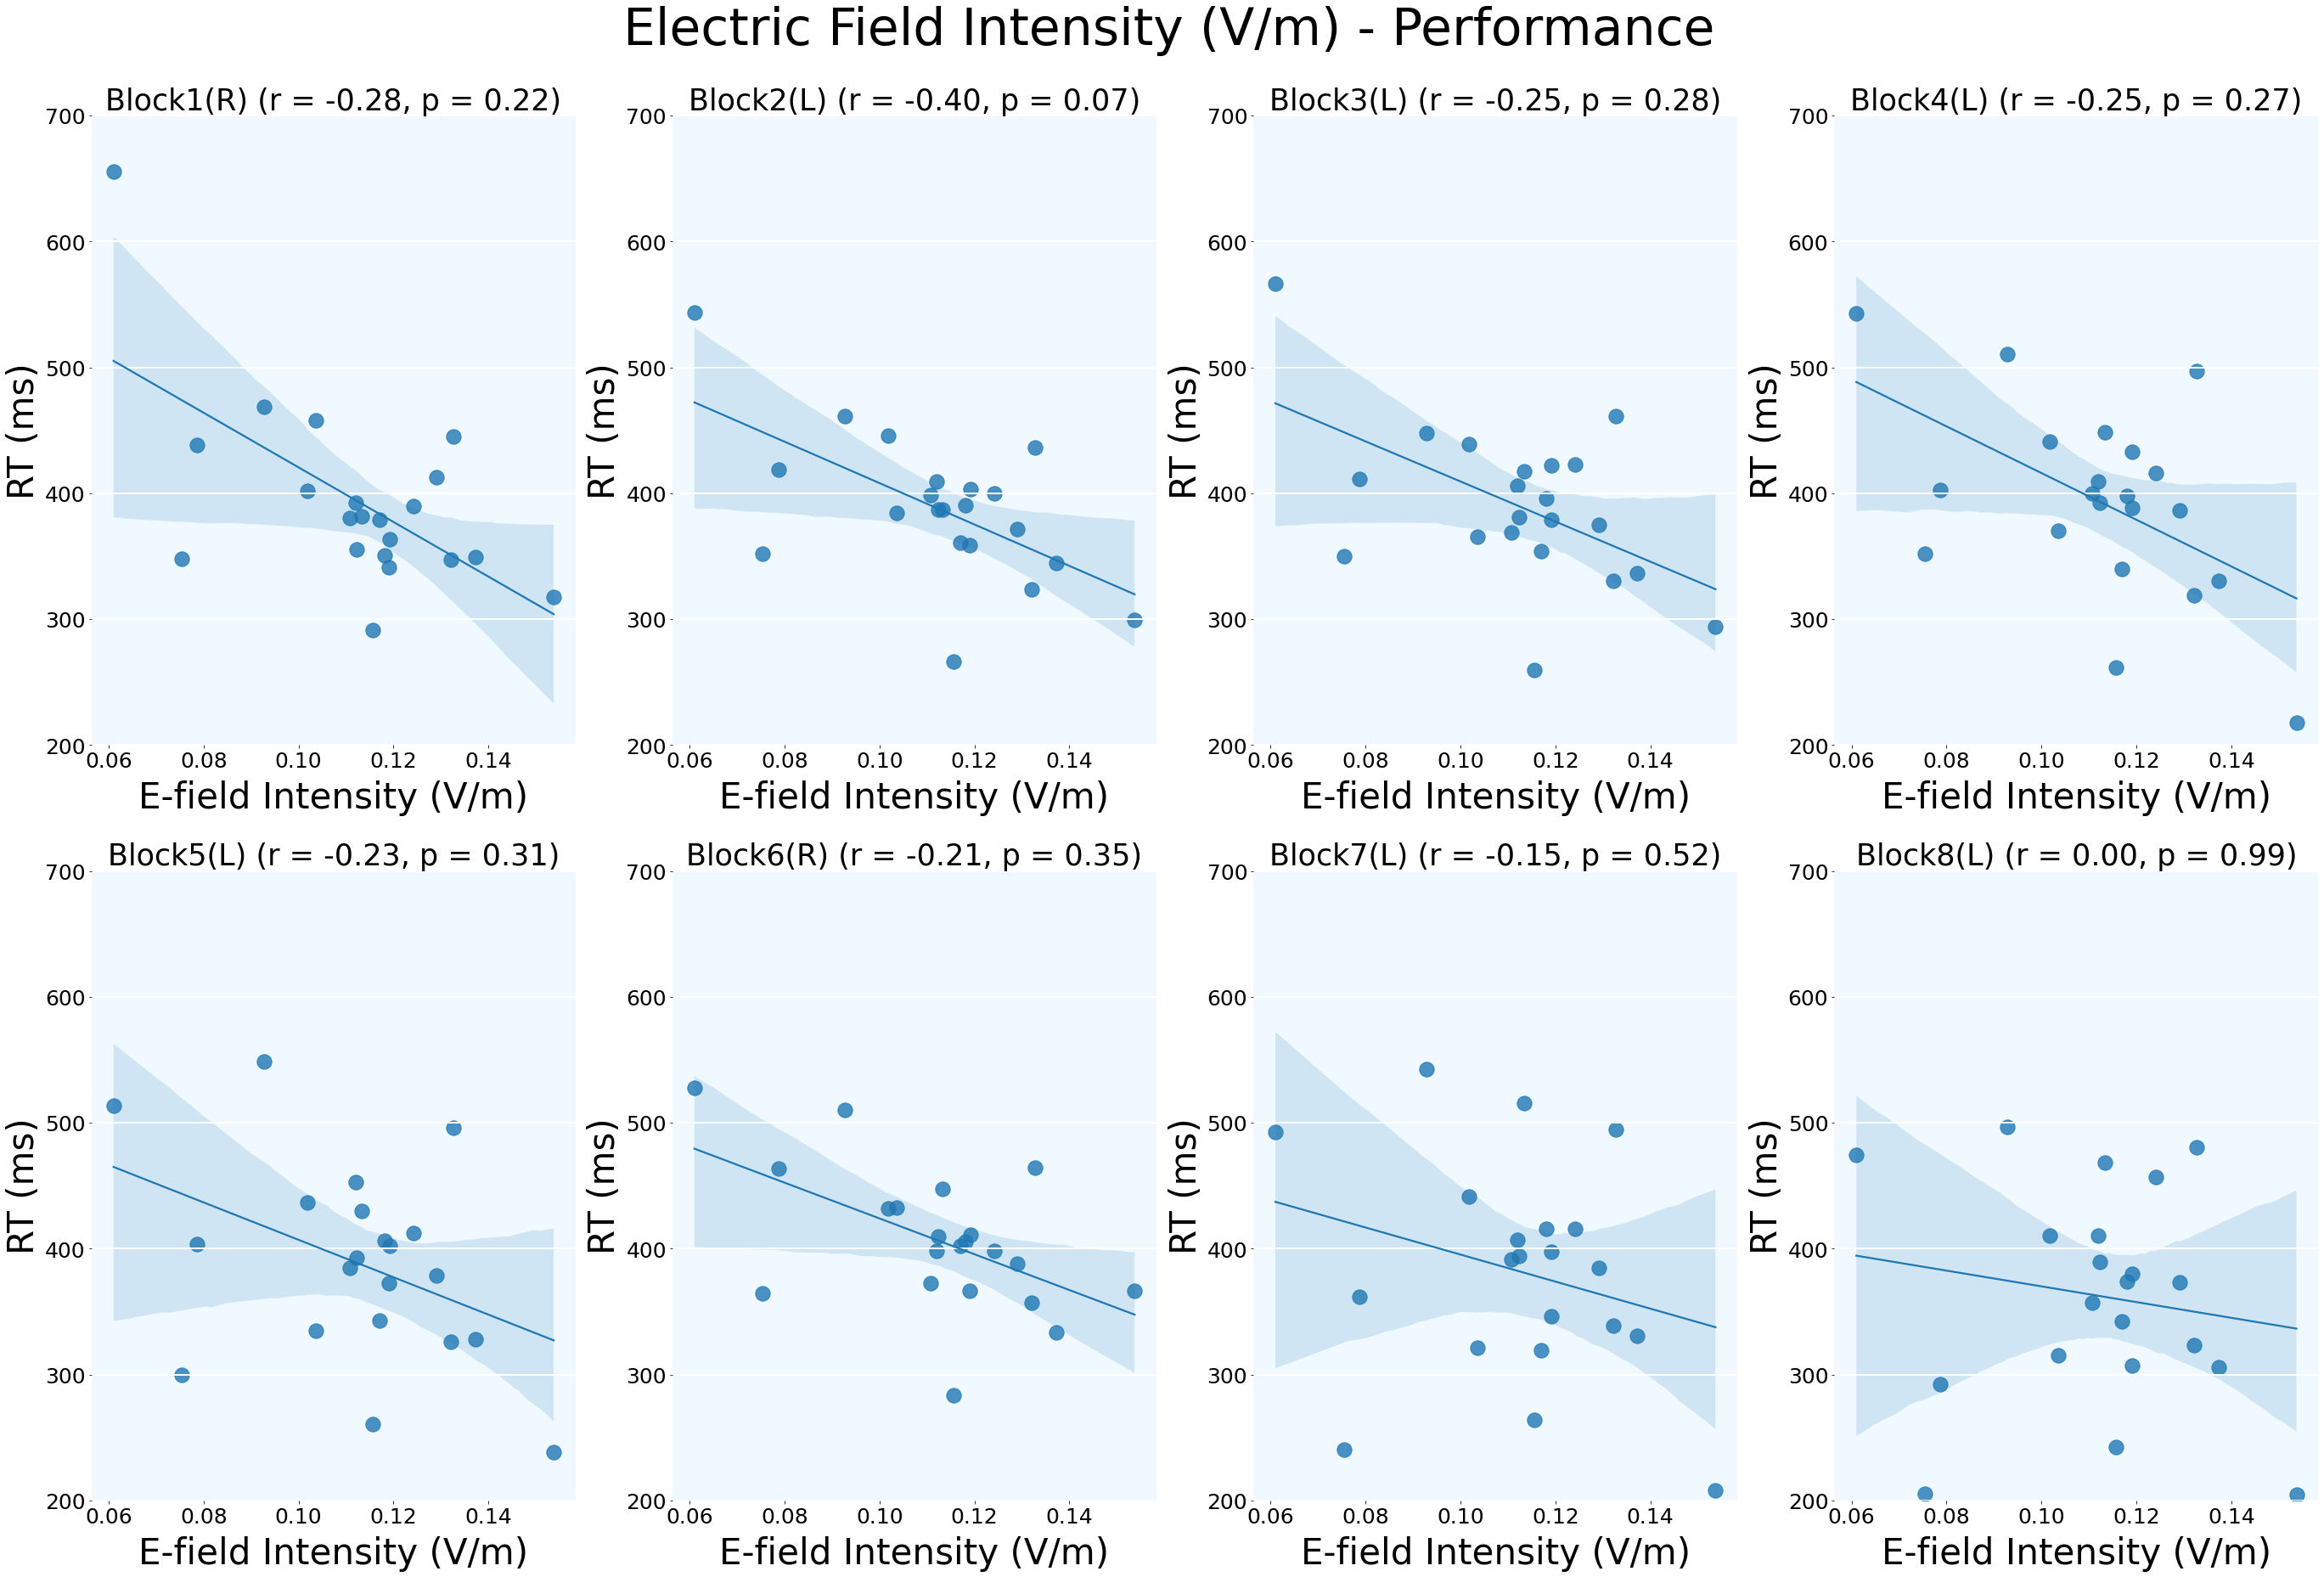

In [11]:
# plt.figure(figsize=(47,29))
fig, axes = plt.subplots(2,4, figsize = (47, 30))
ax = axes.flat
for i, block in enumerate(ind_blocks):
    for _, spine in ax[i].spines.items():
        spine.set_visible(False)
    ax[i].grid(True, axis = "y", color='w', linestyle='-', linewidth=2)
    # ax[i].patch.set_facecolor('#0B2447')#
    g = sns.regplot(ax = ax[i], data = corr_df, x = "EFI_fix", y = block, scatter_kws={"s" : 300})#,line_kws = {"color": "red"})#0B2447
    # plt.plot(corr_df["EFI_fix"].tolist(), data_fitline_fix["Block" + str(i[0]+1)], c = "red")
    g.set(ylim=(200, 700))
    ax[i].xaxis.set_tick_params(labelsize = 25)
    ax[i].yaxis.set_tick_params(labelsize = 25)
    ax[i].set_ylabel("RT (ms)", fontsize = 42, fontname = "sans-serif")
    ax[i].set_xlabel("E-field Intensity (V/m)", fontsize = 42, fontname = "sans-serif", labelpad=10)
    ax[i].patch.set_facecolor('.91')
    if i == 0 or i==5:
        ax[i].set_title("B" + block[-5:] + "(R)"+ " (r = {:0.2f}".format(fix_corr["r_value"][i]) + ", p = {:0.2f})".format(fix_corr["p_value"][i]), fontsize = 35,fontname = "sans-serif")
    else:
        ax[i].set_title("B" + block[-5:] + "(L)"+" (r = {:0.2f}".format(fix_corr["r_value"][i]) + ", p = {:0.2f})".format(fix_corr["p_value"][i]), fontsize = 35,fontname = "sans-serif")
    ax[i].set_facecolor('#f0f9ff')#((0.729, 0.961, 1.0))#('#DAF5FF')
fig.suptitle("Electric Field Intensity (V/m) - Performance", fontsize = 60, fontname = "sans-serif", y=0.94)
# plt.savefig(r"/efi_rtmA.jpg", format = "jpg", dpi = 300)


Dose RT correlation plot

Text(0.5, 0.94, 'Stimulation Intensity(mA) - Performance')

<Figure size 3384x2088 with 0 Axes>

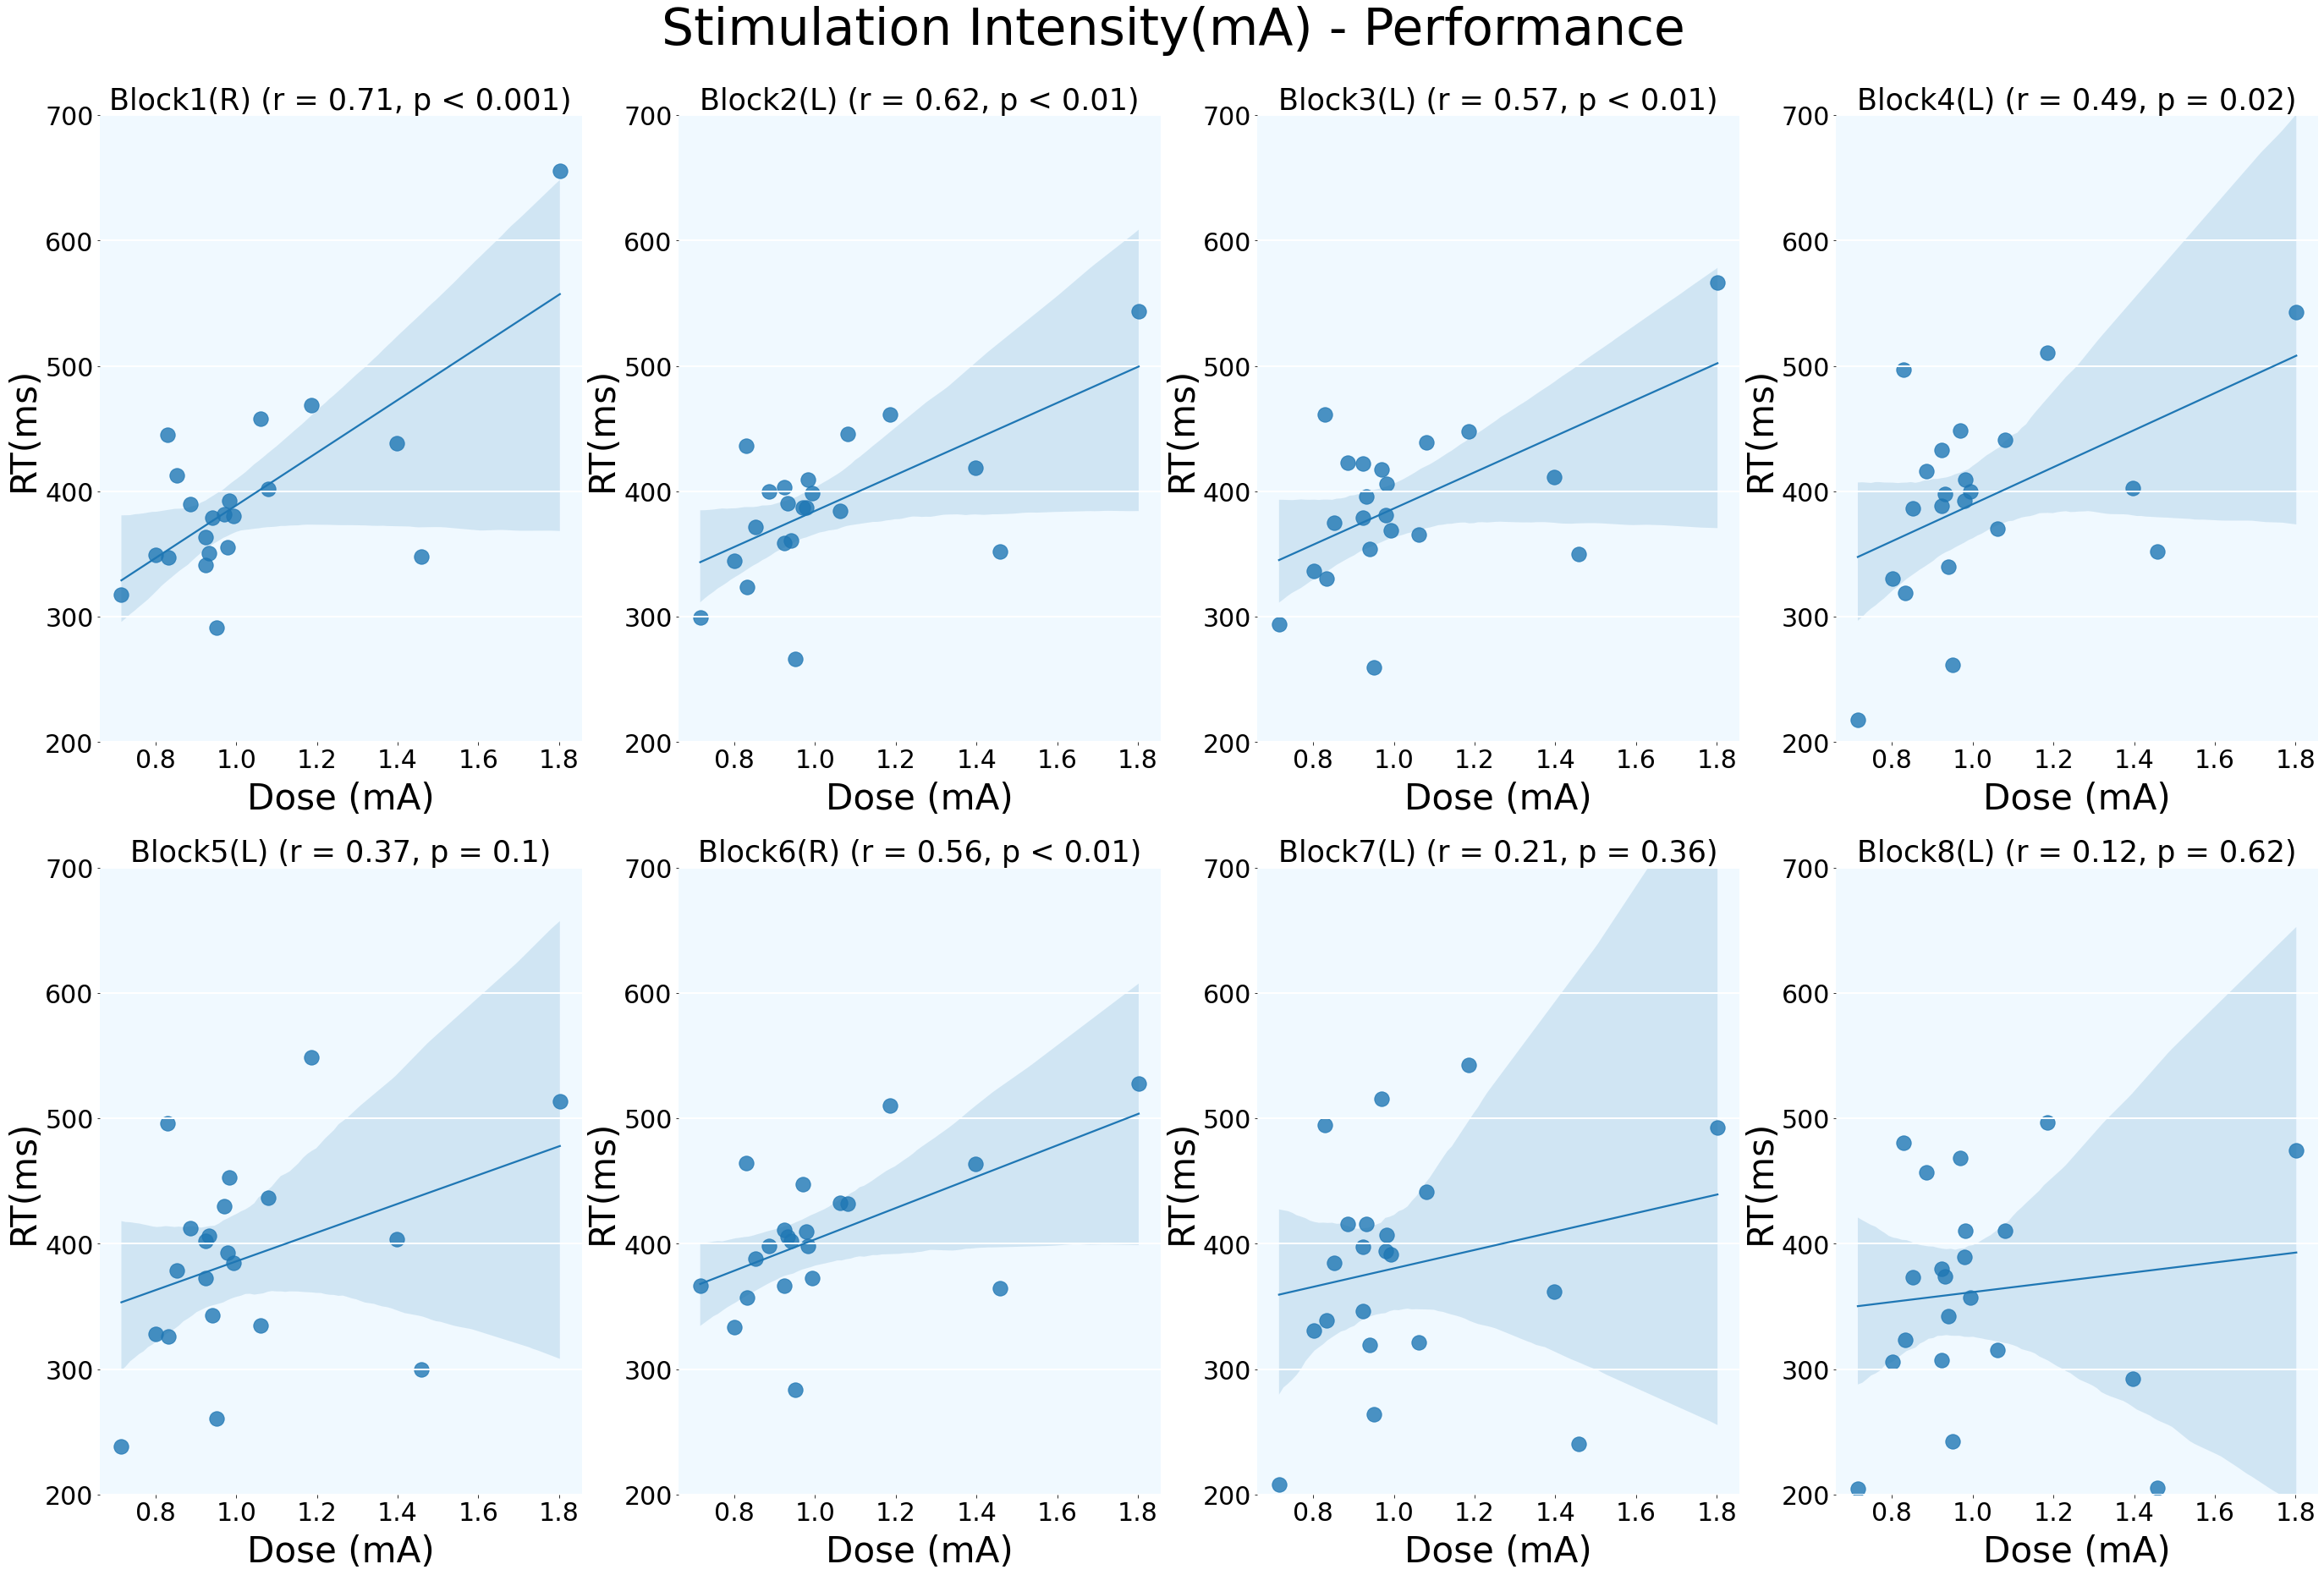

In [16]:
plt.figure(figsize=(47,29))
fig, axes = plt.subplots(2,4, figsize = (47,30))
ax = axes.flat
# plt.tick_params(axis='both', labelsize=30)
for i, block in enumerate(ind_blocks):
    for _, spine in ax[i].spines.items():
        spine.set_visible(False)
    ax[i].grid(True, axis = "y", color='w', linestyle='-', linewidth=2)
    # ax[i].patch.set_facecolor('.91')
    g = sns.regplot(ax = ax[i], data = corr_df, x = "Ind_dose_org", y = block, scatter_kws={'s':300 })
    # plt.plot(corr_df["Ind_dose_org"].tolist(), data_fitline_ind["Block" + str(i[0]+1)], c = "red")
    g.set(ylim=(200, 700))
    ax[i].set_ylabel("RT(ms)", fontsize = 42, fontname = "sans-serif")
    ax[i].set_xlabel("Dose (mA)", fontsize = 42, fontname = "sans-serif", labelpad = 10)
    ax[i].xaxis.set_tick_params(labelsize = 30)
    ax[i].yaxis.set_tick_params(labelsize = 30)
    # ax[i].patch.set_facecolor('.91')
    pValue = ind_corr["p_value"][i]
    if ind_corr["p_value"][i] < 0.001:
        pValue = "p < 0.001"
    elif ind_corr["p_value"][i] < 0.01:
        pValue = "p < 0.01"
    else:
        pValue = f"p = {str(round(pValue, 2))}"
    if i == 0 or i==5:
        ax[i].set_title("B" + block[-5:] + "(R)"+ " (r = {:0.2f}".format(ind_corr["r_value"][i]) + ", "+ str(pValue) + ")", fontsize = 35,fontname = "sans-serif")
    else:
        ax[i].set_title("B" + block[-5:] + "(L)"+" (r = {:0.2f}".format(ind_corr["r_value"][i]) + ", " + str(pValue) + ")", fontsize = 35,fontname = "sans-serif")
    ax[i].set_facecolor('#f0f9ff')#((0.729, 0.961, 1.0))#('#DAF5FF')
    
fig.suptitle("Stimulation Intensity(mA) - Performance", fontsize = 60, fontname = "sans-serif", y=0.94)
# plt.savefig(r'/dose-RT.jpg', format="jpg", dpi = 500)